In [1]:
import pandas as pd 
data = pd.read_csv('D:\End_to_End_MLOps on GCP\predict_loan_apporval\data/clean_data.csv')
data

C:\Users\HP\AppData\Local\Temp\ipykernel_16488\969283777.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\End_to_End_MLOps on GCP\predict_loan_apporval\data/clean_data.csv')


,Unnamed: 0,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,...,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score_1
0,0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,0,728.0,0,0,46643.0,...,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0,728.0
1,1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,1,733.0,1,1,81099.0,...,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0,733.0
2,2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,0,724.0,2,1,60438.0,...,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0,724.0
3,3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,0,740.0,3,0,34171.0,...,990.94,10.0,NaN,21,0,7009,43533.0,0.0,0.0,740.0
4,4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,1,686.0,1,1,47003.0,...,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0,686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,88905,77d7330a-dedb-415a-ac55-865338f27c3f,8ab2250d-4807-4ba2-964e-670e886abbcf,Loan Given,10136,0,728.0,1,0,35476.0,...,567.62,21.2,14.0,14,0,15914,28265.0,0.0,0.0,728.0
88906,88906,7934a353-b3c5-430e-b7fb-03ff163aac20,341809ba-0559-4c66-a0fb-9f52471cd664,Loan Given,29610,0,710.0,1,1,123375.0,...,2508.63,15.0,16.0,11,0,17727,32766.0,0.0,0.0,710.0
88907,88907,d43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13,5dc48d5a-36e9-4e52-9568-d81f218386b0,Loan Given,24394,0,746.0,-1,1,71148.0,...,818.20,36.4,9.0,8,0,44728,53374.0,0.0,0.0,746.0
88908,88908,e3ffa0d5-5164-4815-9231-7ae5e0887dfd,2bfeb5be-6441-4e2d-be6e-20a138127d93,Loan Refused,5030,0,722.0,-1,0,25424.0,...,360.17,19.0,7.0,12,0,6374,18422.0,0.0,0.0,722.0


In [2]:
#Now lets convert categorial data into numerical data
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
for c in cat_cols:
    data[c] = pd.factorize(data[c])[0]

In [3]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data['Loan Status'])

In [4]:
y = lb_results
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [5]:
y = y.ravel()
y.shape

(88910,)

In [17]:
#Scaling all the dependent variables..
import pandas as pd 
df = pd.read_csv('D:\End_to_End_MLOps on GCP\predict_loan_apporval\data/final_data.csv')
df



,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232.0,0.0,728.0,0.0,0.0,46643.0,0.0,777.39,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0
1,25014.0,1.0,733.0,1.0,1.0,81099.0,0.0,892.09,26.7,45.263653,14.0,0.0,35706.0,77961.0,0.0,0.0
2,16117.0,0.0,724.0,2.0,1.0,60438.0,1.0,1244.02,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0
3,11716.0,0.0,740.0,3.0,0.0,34171.0,0.0,990.94,10.0,20.648118,21.0,0.0,7009.0,43533.0,0.0,0.0
4,9789.0,1.0,686.0,1.0,1.0,47003.0,1.0,503.71,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,10136.0,0.0,728.0,1.0,0.0,35476.0,0.0,567.62,21.2,14.000000,14.0,0.0,15914.0,28265.0,0.0,0.0
88906,29610.0,0.0,710.0,1.0,1.0,123375.0,0.0,2508.63,15.0,16.000000,11.0,0.0,17727.0,32766.0,0.0,0.0
88907,24394.0,0.0,746.0,11.0,1.0,71148.0,0.0,818.20,36.4,9.000000,8.0,0.0,44728.0,53374.0,0.0,0.0
88908,5030.0,0.0,722.0,11.0,0.0,25424.0,0.0,360.17,19.0,7.000000,12.0,0.0,6374.0,18422.0,0.0,0.0


In [7]:
from sklearn.preprocessing import scale
from sklearn import preprocessing
X_scaled = preprocessing.scale(df)
print(X_scaled)

[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10958473]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10958473]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10958473]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10958473]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10958473]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.77361168]]


In [9]:
#train test split for our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

%matplotlib inline


In [13]:

def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]


In [15]:
#checking the model with Logistic Regesssion
logit, y_p, y_p2 = classify(LogisticRegression(), X_train, y_train, X_test, y_test)

Accuracy:  0.7195666029318037
Area under the ROC curve:  0.6745198136253778
F-metric:  0.21263157894736842
 
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     18981
           1       0.56      0.13      0.21      7692

    accuracy                           0.72     26673
   macro avg       0.64      0.54      0.52     26673
weighted avg       0.68      0.72      0.65     26673

 
Evaluation by cross-validation:
[0.72630141 0.72975578 0.72635977 0.72893067 0.7260384 ]


Accuracy:  0.7265774378585086
Area under the ROC curve:  0.7401405908193548
F-metric:  0.37425997425997426
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     18981
           1       0.55      0.28      0.37      7692

    accuracy                           0.73     26673
   macro avg       0.65      0.59      0.60     26673
weighted avg       0.70      0.73      0.70     26673

 
Evaluation by cross-validation:
[0.7342545  0.73489717 0.73069816 0.73158191 0.73214429]
[0.13638608 0.328152   0.13278493 0.02713355 0.04691873 0.0380362
 0.02832117 0.02765759 0.02612804 0.02694906 0.02583775 0.02434351
 0.03051716 0.03257626 0.0313454  0.03691252]


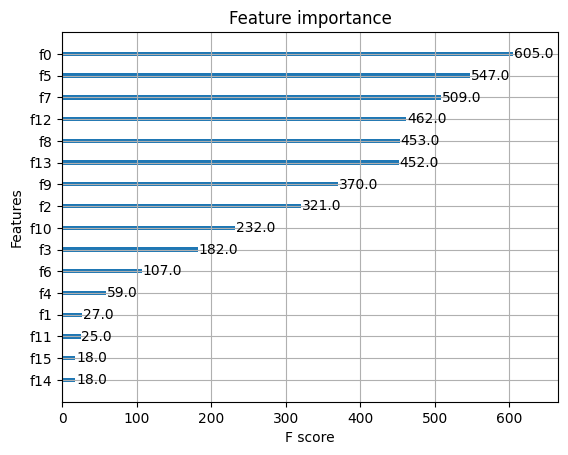

In [16]:
#lets check important features with XGBoost features func
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)
print(xgb0.feature_importances_)
plot_importance(xgb0)
pyplot.show()
#feat1 = feat_importance(xgb0)

In [18]:
#Function to find which features are more important than others through model
import operator
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(df.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

In [20]:
feat1 = feat_importance(xgb0)
print(feat1)

[('Term', 0.328152), ('Current Loan Amount', 0.13638608), ('Credit Score', 0.13278493), ('Home Ownership', 0.046918735), ('Annual Income', 0.038036197), ('Tax Liens', 0.036912523), ('Maximum Open Credit', 0.032576263), ('Bankruptcies', 0.031345397), ('Current Credit Balance', 0.03051716), ('Purpose', 0.028321173), ('Monthly Debt', 0.027657595), ('Years in current job', 0.02713355), ('Months since last delinquent', 0.026949063), ('Years of Credit History', 0.026128044), ('Number of Open Accounts', 0.025837751), ('Number of Credit Problems', 0.024343506)]


In [21]:
#lets check Different models with imbalanced Dataset
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing GradientBoosting - Non-balanced 


C:\Users\HP\AppData\Local\Temp\ipykernel_16488\1392951265.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


computing LogisticRegression - Non-balanced 


C:\Users\HP\AppData\Local\Temp\ipykernel_16488\1392951265.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


computing RandomForestClassifier - Non-balanced 


C:\Users\HP\AppData\Local\Temp\ipykernel_16488\1392951265.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


computing XGBClassifier - Non-balanced 


C:\Users\HP\AppData\Local\Temp\ipykernel_16488\1392951265.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_report = models_report.append(tmp, ignore_index = True)


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.250478,0.753430,0.581141,0.258991,0.358301,Non-balanced
1,LogisticRegression,0.162028,0.673593,0.556856,0.131603,0.212893,Non-balanced
2,RandomForestClassifier,0.178151,0.694375,0.491163,0.226979,0.310478,Non-balanced
3,XGBClassifier,0.241977,0.744547,0.544658,0.286787,0.375734,Non-balanced


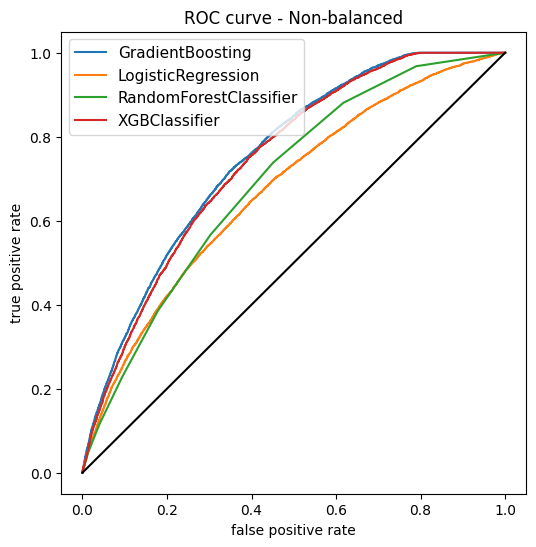

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')
models_report